In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
wine = datasets.load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.target_names.tolist()

['class_0', 'class_1', 'class_2']

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
print(wine.DESCR,'\n')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
data=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['class'])

In [9]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
target.head()

,class
0,0
1,0
2,0
3,0
4,0


#### Explore Data

In [11]:
data.columns=wine.feature_names
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [12]:
data.shape

(178, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [14]:
data.describe().round(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

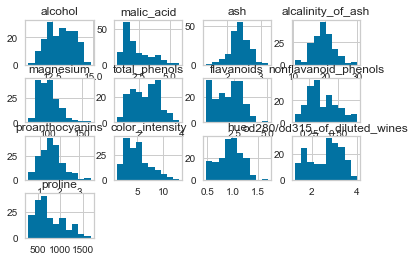

In [15]:
data.hist()

In [16]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [17]:
target.value_counts()

class
1        71
0        59
2        48
dtype: int64

#### Preprocess data

##### 01 - If you do not search the best k, then do not split the data

In [18]:
data1=data.copy()

In [19]:
# Skewed distribution (X) -->log(X) or sqrt(X) or power transform--> Normal distribution
# Feature scaling: scale of features to be in the same range (Minmaxscaler <Normalization> or Standardscaler <Standardlization>)
# A row of input [x1,x2,---,xn] to be a norm --> normalizer
scaler1=MinMaxScaler().fit(data1)
data1=pd.DataFrame(scaler1.transform(data1), columns=wine.feature_names)

In [20]:
data1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 02 - If you search the best k, then split the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [22]:
X_train.shape

(124, 13)

In [23]:
X_test.shape

(54, 13)

In [24]:
y_train.value_counts()

class
1        50
0        41
2        33
dtype: int64

In [25]:
y_test.value_counts()

class
1        21
0        18
2        15
dtype: int64

In [26]:
y_test.sort_index().head()

,class
2,0
3,0
8,0
10,0
14,0


In [27]:
scaler2=MinMaxScaler().fit(X_train)
X_train=scaler2.transform(X_train)
X_train

array([[0.54301075, 0.19565217, 0.22222222, ..., 0.5203252 , 0.6007326 ,
        0.62196862],
       [0.75268817, 0.16403162, 0.60130719, ..., 0.52845528, 0.47619048,
        0.60770328],
       [0.58333333, 0.2055336 , 0.2875817 , ..., 0.46341463, 0.78021978,
        0.55064194],
       ...,
       [0.55913978, 0.22924901, 0.68627451, ..., 0.10569106, 0.02197802,
        0.10485021],
       [0.33870968, 0.41304348, 0.33986928, ..., 0.54471545, 0.74358974,
        0.0085592 ],
       [0.83064516, 0.14624506, 0.40522876, ..., 0.56097561, 0.56776557,
        0.7146933 ]])

In [28]:
X_train=pd.DataFrame(X_train,columns=wine.feature_names)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.543011,0.195652,0.222222,0.069364,0.166667,0.582734,0.607375,0.057692,0.788644,0.595506,0.520325,0.600733,0.621969
1,0.752688,0.164032,0.601307,0.508671,0.440476,0.665468,0.635575,0.500000,0.413249,0.528090,0.528455,0.476190,0.607703
2,0.583333,0.205534,0.287582,0.000000,0.261905,0.557554,0.496746,0.230769,0.274448,0.278652,0.463415,0.780220,0.550642
3,0.360215,0.077075,0.300654,0.450867,0.107143,0.863309,0.570499,0.096154,0.460568,0.286517,0.601626,0.586081,0.101284
4,0.725806,0.715415,0.366013,0.653179,0.119048,0.064748,0.000000,0.730769,0.233438,0.530337,0.243902,0.175824,0.172611


In [29]:
X_test=scaler2.transform(X_test)
X_test=pd.DataFrame(X_test,columns=wine.feature_names)

#### Model

##### 01 - If you do not search the best k, then use KMeans to fit and predict the whole dataset

In [30]:
#Create KMean Cluster
km1 =KMeans(n_clusters=3)

#Train the model using the training sets
km1.fit(data1)

#Predict the response for test dataset
target_pred = km1.predict(data1)

In [31]:
km1.cluster_centers_.round(2)

array([[0.54, 0.48, 0.56, 0.54, 0.31, 0.24, 0.11, 0.62, 0.23, 0.48, 0.19,
        0.16, 0.25],
       [0.71, 0.25, 0.58, 0.34, 0.41, 0.64, 0.55, 0.3 , 0.48, 0.36, 0.48,
        0.69, 0.59],
       [0.31, 0.24, 0.47, 0.5 , 0.25, 0.45, 0.38, 0.41, 0.4 , 0.15, 0.47,
        0.59, 0.16]])

In [32]:
cluster_result=pd.DataFrame(km1.cluster_centers_,columns=data1.columns,index=['cluster_1','cluster_2','cluster_3'])
cluster_result

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster_1,0.544689,0.478441,0.560136,0.538332,0.311462,0.244765,0.107135,0.618525,0.228276,0.482640,0.192550,0.160906,0.247400
cluster_2,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
cluster_3,0.311375,0.236899,0.472917,0.499917,0.247721,0.453059,0.382401,0.411747,0.397425,0.147735,0.473512,0.588976,0.156401


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

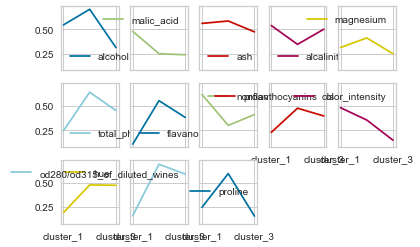

In [33]:
cluster_result.plot(subplots=True,layout=(3,5),sharey=True)

In [34]:
km1.score(data1)

-48.96051713667647

In [35]:
data2=data1.copy()
data2['target']=target
data2['target_pred']=target_pred

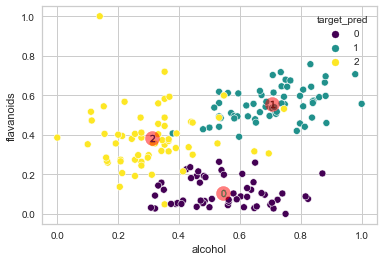

In [36]:
sns.scatterplot(data=data2,x='alcohol',y='flavanoids',hue='target_pred', palette='viridis')
centers = km1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 6], c='red', marker='o',s=200, alpha=0.5)
for i, c in enumerate(centers):
        plt.scatter(c[0], c[6], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")


<AxesSubplot:xlabel='alcohol', ylabel='flavanoids'>

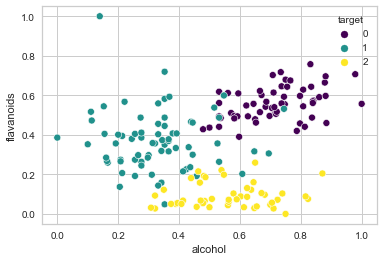

In [37]:
sns.scatterplot(data=data2,x='alcohol', y='flavanoids',hue='target',palette='viridis')

In [38]:
metrics.cluster.contingency_matrix(data2['target'],data2['target_pred'])

array([[ 0, 59,  0],
       [ 7,  2, 62],
       [48,  0,  0]])

In [39]:
#The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
metrics.cluster.silhouette_score(data2.iloc[:,0:12],data2['target_pred'],metric='euclidean')

0.2646269832914196

In [40]:
metrics.adjusted_mutual_info_score(data2['target'],data2['target_pred'])

0.8400068384414524

##### 02 - If you search the best k, then use KMeans to fit the train set and test set. Later, you can try KMeans with different number of k, then based on the evaluation metrics to select the best k.

In [41]:
km2 = KMeans(n_clusters=5)

#Train the model using the training sets
km2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train=km2.predict(X_train)
y_pred_test = km2.predict(X_test)

In [42]:
print(km2.score(X_train))
print(km2.score(X_test))

-31.672367756225142
-17.062128586159954


minus score, data is reversed

In [43]:
metrics.cluster.silhouette_score(X_train,y_pred_train,metric='euclidean')

0.21091397712409302

In [44]:
metrics.cluster.silhouette_score(X_test,y_pred_test,metric='euclidean')

0.17278177687348636

##### 03 - If you search the best k, you can do directly search the best k based on trainset by using cv (cross validation)

In [45]:
Sum_of_squared_distances_train = []
Sum_of_squared_distances_test = []
Silhouette_train=[]
Silhouette_test=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    pred_train=km.predict(X_train)
    pred_test=km.predict(X_test)
    Sum_of_squared_distances_train.append(abs(km.score(X_train)))
    Sum_of_squared_distances_test.append(abs(km.score(X_test)))
    Silhouette_train.append(metrics.cluster.silhouette_score(X_train,pred_train,metric='euclidean'))
    Silhouette_test.append(metrics.cluster.silhouette_score(X_test,pred_test,metric='euclidean'))

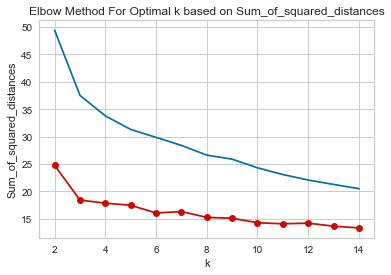

In [46]:
plt.plot(K, Sum_of_squared_distances_train, 'bx-')
plt.plot(K, Sum_of_squared_distances_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k based on Sum_of_squared_distances')
plt.show()

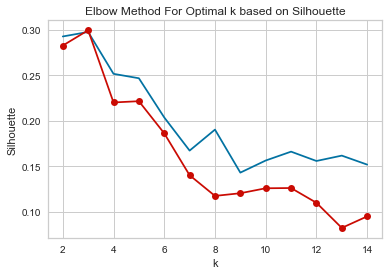

In [47]:
plt.plot(K, Silhouette_train, 'bx-')
plt.plot(K, Silhouette_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Elbow Method For Optimal k based on Silhouette')
plt.show()

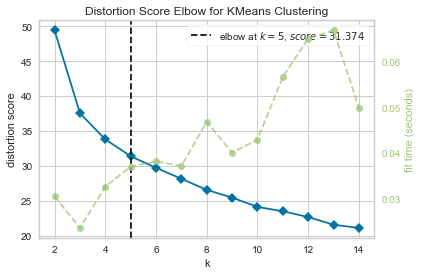

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
visualizer = KElbowVisualizer(KMeans(), k=(2,15),metric='distortion') 
#distortion: mean sum of squared distances to centers
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

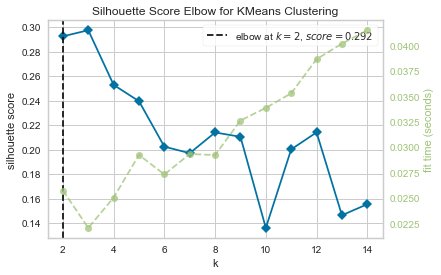

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,15),metric='silhouette')
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure